In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_dir = '/content/drive/My Drive/Colab Notebooks/Lung X-Ray Image'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)


In [4]:
# Create data loaders for train and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1880 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


In [5]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 445s 7s/step - accuracy: 0.8357 - loss: 1.3262 - val_accuracy: 0.4681 - val_loss: 7.1035
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 329s 5s/step - accuracy: 0.8908 - loss: 0.3944 - val_accuracy: 0.4681 - val_loss: 10.9661
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.9016 - loss: 0.3665 - val_accuracy: 0.5723 - val_loss: 4.3444
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.9033 - loss: 0.4053 - val_accuracy: 0.6426 - val_loss: 2.5327
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.9156 - loss: 0.2363 - val_accuracy: 0.4681 - val_loss: 13.3312
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/step - accuracy: 0.9295 - loss: 0.1901 - val_accuracy: 0.8340 - val_loss: 1.2606
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.9201 - loss: 0.2242 - val_accuracy: 0.8596 - val_loss: 0.9199
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 332s 6s/step - accuracy: 0.9239 - loss: 0.2193 - val_accuracy: 0.7830 - val_loss: 

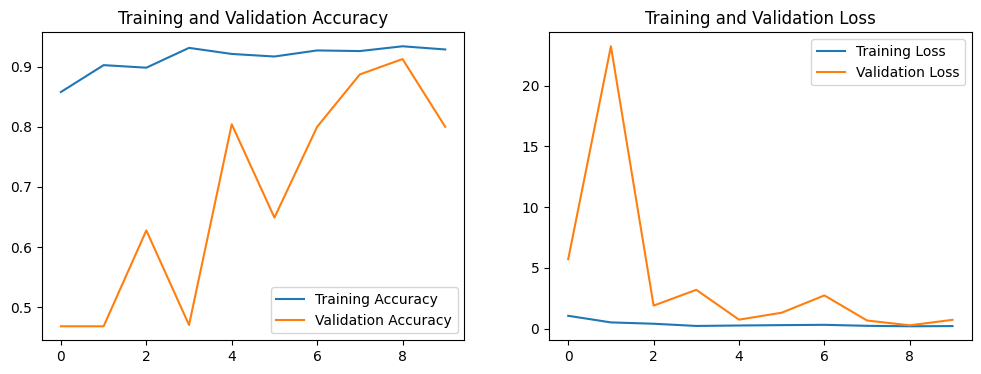

In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
# Generate a classification report and confusion matrix
val_generator.reset()
preds = model.predict(val_generator)
preds = np.round(preds).astype(int).flatten()
print(classification_report(val_generator.classes, preds, target_names=['Normal', 'Viral Pneumonia']))

cm = confusion_matrix(val_generator.classes, preds)
print("Confusion Matrix:\n", cm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
                 precision    recall  f1-score   support

         Normal       0.55      0.34      0.42       250
Viral Pneumonia       0.48      0.69      0.56       220

       accuracy                           0.50       470
      macro avg       0.51      0.51      0.49       470
   weighted avg       0.51      0.50      0.48       470

Confusion Matrix:
 [[ 84 166]
 [ 69 151]]


In [ ]:
# Save the trained model
model.save("/content/drive/My Drive/Colab Notebooks/lung_disease_detector_final.h5")
